Задание 1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
n=10 #количество наблюдений
x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110],dtype=np.float64)
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832],dtype=np.float64)

Коэффициенты уравнения линейной регрессии можно найти следующим образом:
$$b = \frac{\overline{yx} - \overline{y} \cdot {\overline{x}}}{\overline{x^2} - (\overline{x})^2};$$
$$a = \overline{y} - b \cdot {\overline{x}}.$$

In [3]:
b = (np.mean(x * y) - np.mean(x) * np.mean(y)) / (np.mean(x**2) - np.mean(x) ** 2)
a = np.mean(y) - b * np.mean(x)
print(f'a: {a}') #значение при предикторе равном нулю
print(f'b: {b}') #угол наклона прямой

a: 444.1773573243596
b: 2.620538882402765


Уравнение линейной регрессии: $$y = a + bx$$
в нашем случае:$$y = 444.17 + 2.62\cdot x$$

In [4]:
r = b * np.std(x) / np.std(y) 
r

0.8874900920739162

Узнать, насколько велика связь между переменными $x$ и $y$, можно через коэффициент детерминации. Его можно посчитать

как квадрат коэффициента корреляции:
$$R^2 = r^{2}_{xy}$$

In [5]:
R2 = r**2 #коэффициент детерминации
R2 

0.7876386635293682

т.е. скорринговый бал на 78.7% объясняется заработной платой заемщика

In [6]:
y_pred = a + b * x
y_pred #расчет предсказанний кредитного скорринга

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

Качество модели найдем с помощью средней ошибки аппроксимации $\overline {A}$:

In [7]:
A_mean = 100 * np.mean(np.abs((y - y_pred) / y))
A_mean

11.46925184356171

Значение $F_{факт}$:

Фактическая величина F-критерия для парной линейной регрессии (когда есть только один факторный признак):
$$F_{факт} = \frac{r_{xy}^{2} \cdot (n - 2)}{(1 - r_{xy}^{2})}$$

In [8]:
F_fact = (r**2 * (n - 2)) / (1 - r**2)
print(f'Фактическое значение критерия Фишера:{F_fact}')

Фактическое значение критерия Фишера:29.671640859664432


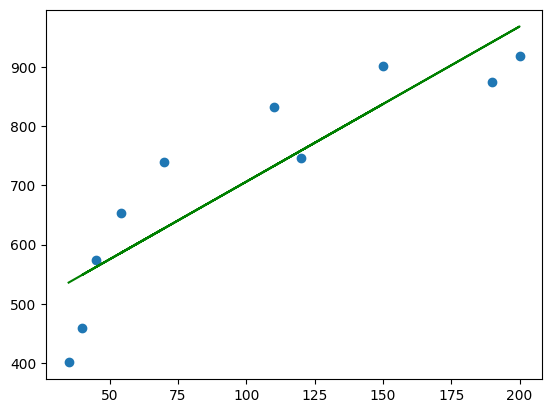

In [9]:
plt.scatter(x,y)
plt.plot(x,444.17+2.62*x, 'green')
plt.show()

Поиск с помощью линейного метода наименьших квадратов:
$$b = (X^T \cdot X)^{-1} \cdot X^T \cdot y$$

In [10]:
x1 = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y1 = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
np.column_stack([x1, y1])

array([[ 35, 401],
       [ 45, 574],
       [190, 874],
       [200, 919],
       [ 40, 459],
       [ 70, 739],
       [ 54, 653],
       [150, 902],
       [120, 746],
       [110, 832]])

Коэффициент линейной регрессии без b0(intercept): [5.88982042]


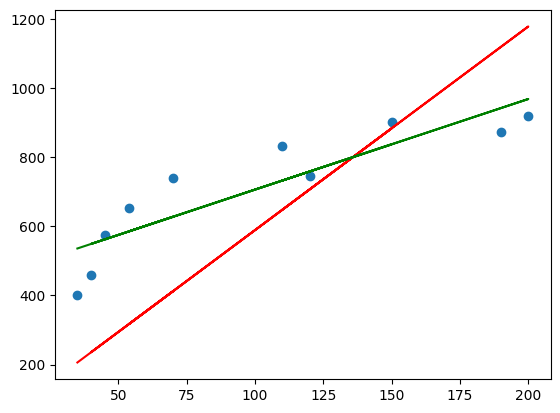

In [11]:
data = np.column_stack([x1, y1])
X, y = data[:,0], data[:,1]
X = X.reshape((len(X), 1))
b = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print(f'Коэффициент линейной регрессии без b0(intercept): {b}')
y_result = X.dot(b)
plt.scatter(X, y)
plt.plot(X, y_result, color='red')
plt.plot(x,444.17+2.62*x, 'green')
plt.show()

Задание 2. В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента?

Критерий Фишера для двух выборок проверяет нулевую гипотезу о равенстве дисперсий двух выборок, а критерий Стьюдента – гипотезу о равенстве выборочных средних.

Если $\sigma$ известно, т.е. анализ проводился, то критерий оценки $K$ является критерием Фишера $Z$ из таблицы распределения Лапласа

Если среднеквадратичное отклонение $\sigma$ не известно, т.е. не было анализа, то критерий оценки $K$ равен критерию оценки $T$ из таблицы распределения Стьюдента